In [20]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

mcmc = pickle.load(open('../model/mem_result_with_jeffrey.pkl','rb'))
params={'beta0':-1, 'beta1':2, 'mu_x':0.5, 's2_x':1, 's2_ep':1, 's2_v':1}
# params={'beta0':-1, 'beta1':2, 'gam0':-1, 'gam1':3 , 'mu_x':0.5, 's2_x':1, 's2_ep':1, 's2_v':1, 's2_d':1}


beta0 = mcmc.act_params['beta0']
beta1 = mcmc.act_params['beta1']
# gam0 = mcmc.act_params['gam0']
# gam1 = mcmc.act_params['gam1']
mu_x = mcmc.act_params['mu_x']
s2_x = mcmc.act_params['s2_x']
s2_ep = mcmc.act_params['s2_ep']
s2_v = mcmc.act_params['s2_v']
# s2_d = mcmc.act_params['s2_d']
y = mcmc.act_params['y']
x = mcmc.act_params['x']
w = mcmc.act_params['w']
# z = mcmc.act_params['z']
n=120

# beta0 = -1; beta1 = 1
# s2_v = 1/36; s2_d = 1/30; s2_x = 1/36; s2_ep = 0.35

np.random.seed(1)
v = np.random.normal(0, np.sqrt(s2_v), n)
# w = np.random.normal(mu_x, np.sqrt(s2_x + s2_v), n)
# np.random.seed(1)
# d = np.random.normal(0, np.sqrt(s2_d), n)
# z = np.random.normal(mu_x, np.sqrt(s2_x + s2_d), n)
# np.random.seed(1)
x = np.random.normal(mu_x, np.sqrt(s2_x), n)
# w = np.random.normal(x, np.sqrt(s2_v), n)
# z = np.random.normal(x, np.sqrt(s2_d), n)
# np.random.seed(1)
ep = np.random.normal(0, np.sqrt(s2_ep), n)
# observed
w = x+v
# z = gam0 + gam1*x+d
y = beta0 + beta1*x + ep

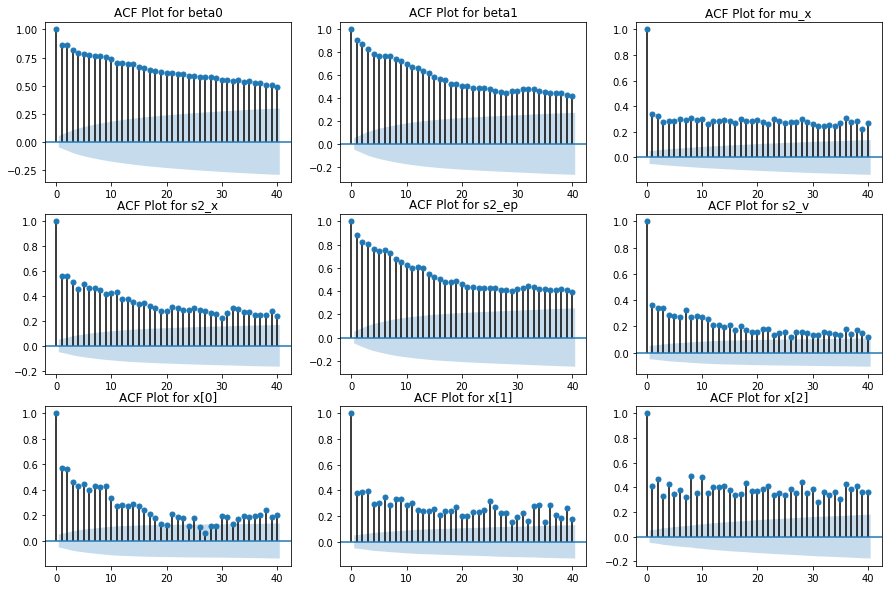

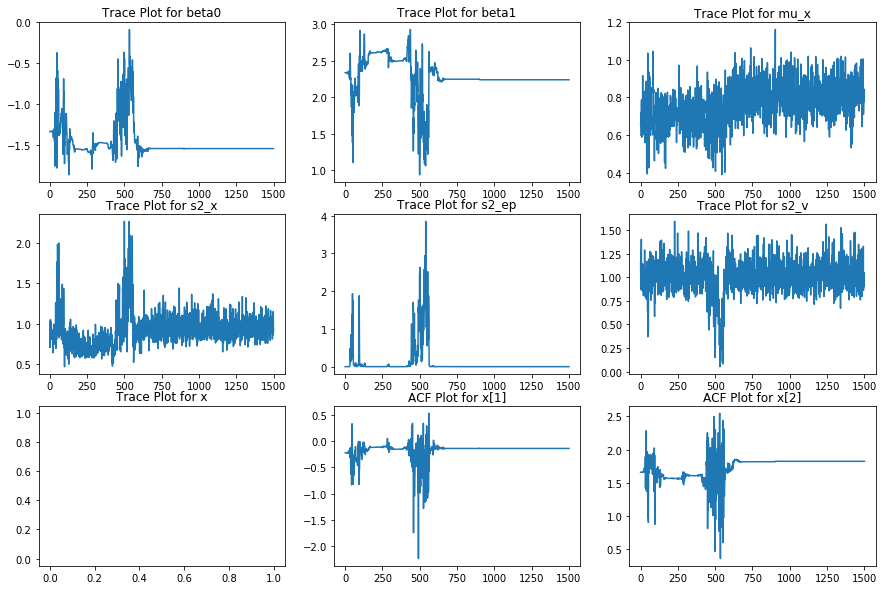

/Users/shinbo/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Users/shinbo/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/shinbo/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


IndexError: list index out of range

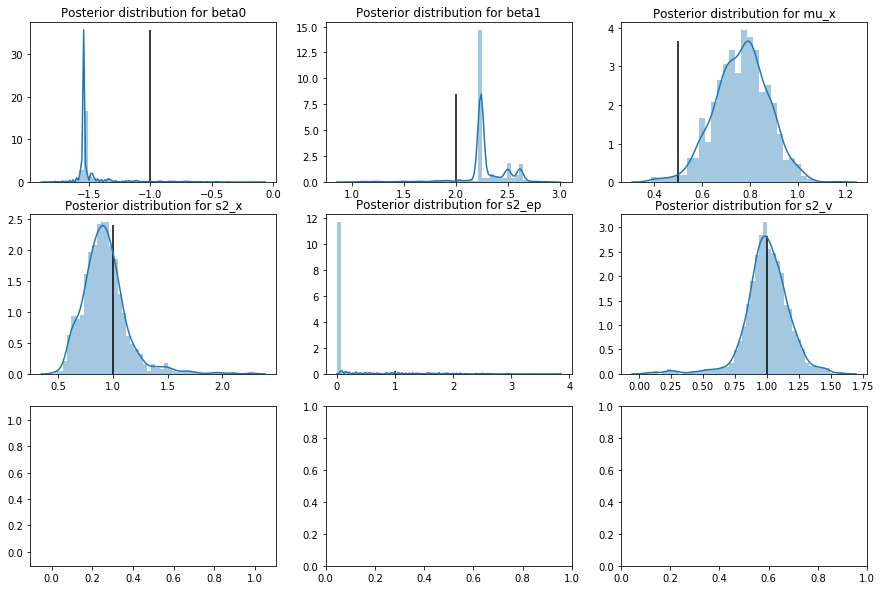

In [21]:
burnin = 20000
thinning = 20

fig, ax = plt.subplots(3,3,figsize=(15,10))
a = 0
for i in range(3):
    for j in range(3):
        
        if i==2:

            key = 'x'
            plot_acf(mcmc.params[key][j,:][burnin::thinning], lags=40, ax=ax[i][j])
            ax[i][j].set_title(f'ACF Plot for {key}[{j}]')
        else:
            key = list(mcmc.params.keys())[a]
            plot_acf(mcmc.params[key][burnin::thinning], lags=40, ax=ax[i][j])
            ax[i][j].set_title(f'ACF Plot for {key}')
            
        a += 1
plt.savefig('autocorr.png')
plt.show()



fig, ax = plt.subplots(3,3,figsize=(15,10))
a = 0
for i in range(3):
    for j in range(3):
        if (i == 2 and j == 1) or (i == 2 and j == 2):

            key = 'x'
            ax[i][j].plot(mcmc.params[key][j,:][burnin::thinning])
            ax[i][j].set_title(f'ACF Plot for {key}[{j}]')
        else:
            key = list(mcmc.params.keys())[a]
            ax[i][j].plot(mcmc.params[key][burnin::thinning])
            ax[i][j].set_title(f'Trace Plot for {key}')
        a += 1
plt.savefig('traceplot.png')
plt.show()

fig, ax = plt.subplots(3,3,figsize=(15,10))
a = 0
for i in range(3):
    for j in range(3):
        if (i == 2 and j == 1) or (i == 2 and j == 2):

            key = 'x'
            sns.distplot(mcmc.params[key][j,:][burnin::thinning], ax=ax[i][j], norm_hist=True)
            kdeline = ax[i][j].lines[0]
            xs = kdeline.get_xdata()
            ys = kdeline.get_ydata()
            ax[i][j].vlines(params[key] ,0, ys.max())
            ax[i][j].set_title(f'Posterior distribution for {key}[{j}]')
            
        else:
            key = list(mcmc.params.keys())[a]
            sns.distplot(mcmc.params[key][burnin::thinning], ax=ax[i][j], norm_hist=True)
            kdeline = ax[i][j].lines[0]
            xs = kdeline.get_xdata()
            ys = kdeline.get_ydata()
            ax[i][j].vlines(params[key] ,0, ys.max())
            ax[i][j].set_title(f'Posterior distribution for {key}')
            
        a += 1
plt.savefig('/Users/shinbo/Desktop/metting/LDA/meeting materials/20.11.19/density_mem_120.png')
plt.show()

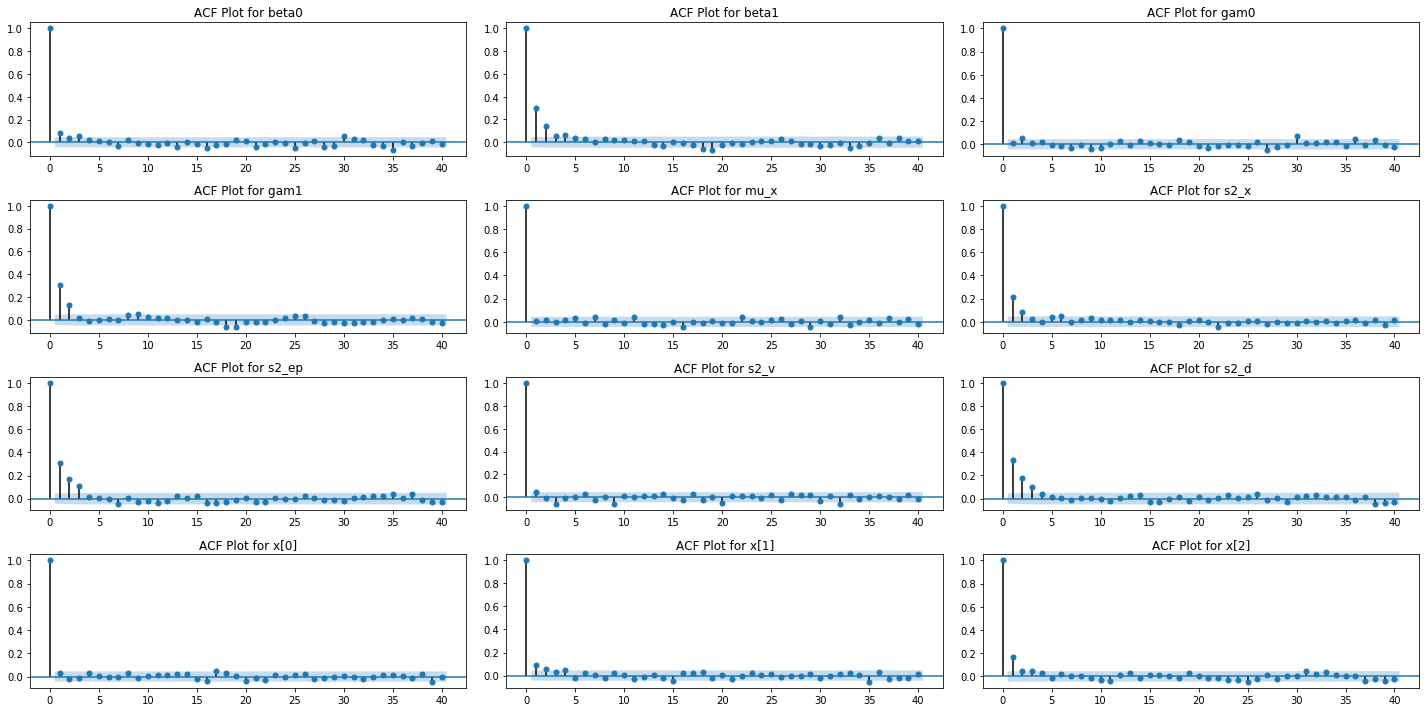

In [100]:
burnin = 10000
thinning = 20

fig, ax = plt.subplots(4,3,figsize=(20,10))
a = 0
for i in range(4):
    for j in range(3):
        
        if i==3:
            key = 'x'
            plot_acf(mcmc.params[key][j,:][burnin::thinning], lags=40, ax=ax[i][j])
            ax[i][j].set_title(f'ACF Plot for {key}[{j}]')
        else:
            key = list(mcmc.params.keys())[a]
            plot_acf(np.array(mcmc.params[key])[burnin::thinning], lags=40, ax=ax[i][j])
            ax[i][j].set_title(f'ACF Plot for {key}')
            
        a += 1
fig.tight_layout()
plt.savefig('autocorr.png')
plt.show()

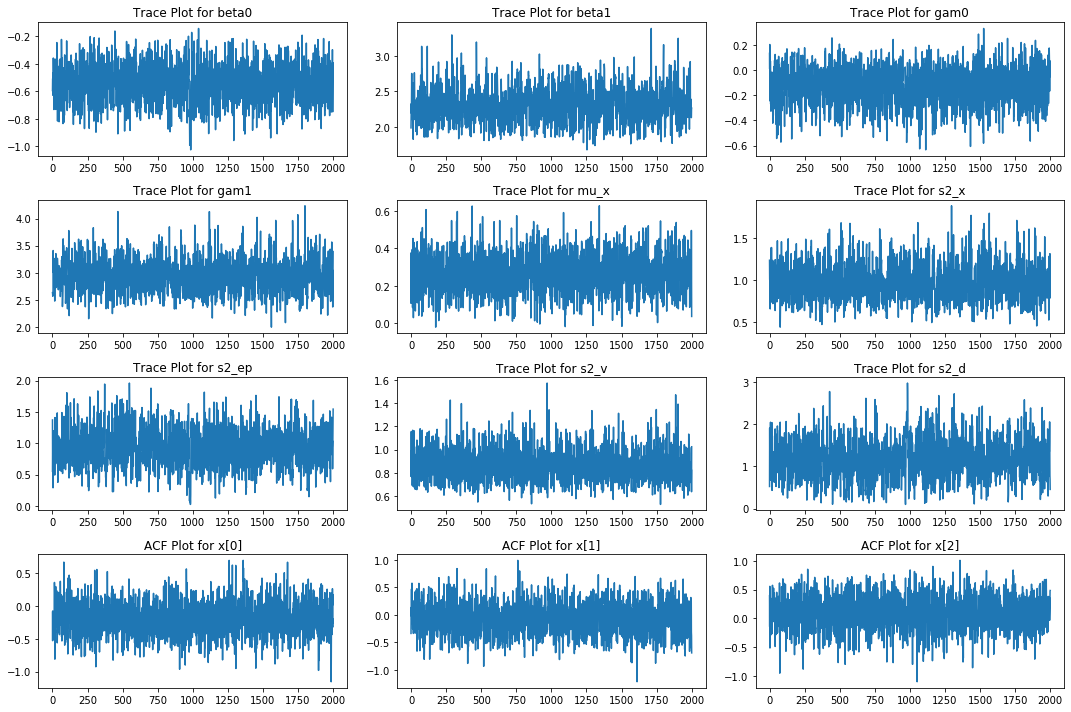

In [101]:
fig, ax = plt.subplots(4,3,figsize=(15,10))
a = 0
for i in range(4):
    for j in range(3):
        if i==3:
            key = 'x'
            ax[i][j].plot(mcmc.params[key][j,:][burnin::thinning])
            ax[i][j].set_title(f'ACF Plot for {key}[{j}]')
        else:
            key = list(mcmc.params.keys())[a]
            ax[i][j].plot(mcmc.params[key][burnin::thinning])
            ax[i][j].set_title(f'Trace Plot for {key}')
        a += 1
fig.tight_layout()
plt.savefig('traceplot.png')
plt.show()

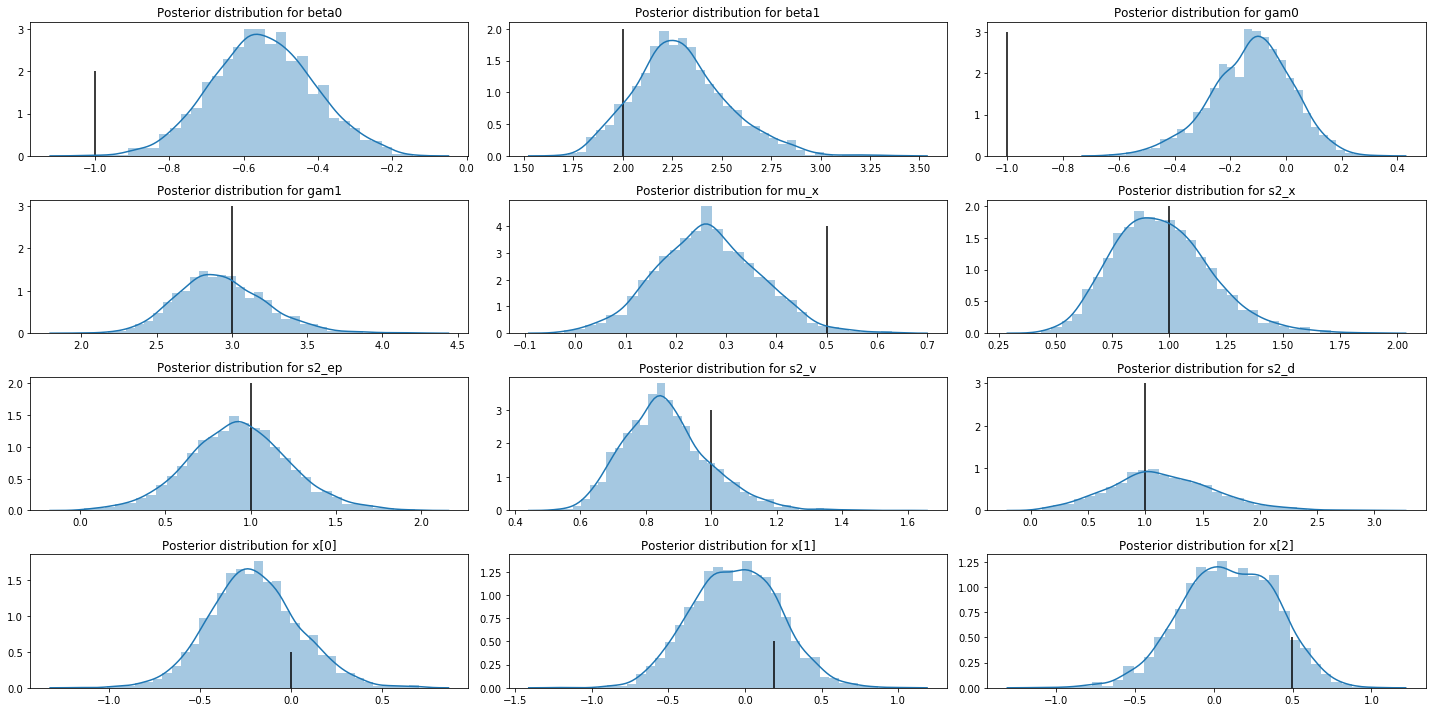

In [102]:
fig, ax = plt.subplots(4,3,figsize=(20,10))
a = 0
for i in range(4):
    for j in range(3):
        if i==3:
            key = 'x'
            sns.distplot(mcmc.params[key][j,:][burnin::thinning], ax=ax[i][j], norm_hist=True)
            ax[i][j].vlines(x[j] ,0, 0.5)
            ax[i][j].set_title(f'Posterior distribution for {key}[{j}]')
            
        else:
            key = list(mcmc.params.keys())[a]
            sns.distplot(mcmc.params[key][burnin::thinning], ax=ax[i][j], norm_hist=True)
            ax[i][j].vlines(params[key] ,0, heights[key])
            ax[i][j].set_title(f'Posterior distribution for {key}')
            
        a += 1
fig.tight_layout()
plt.savefig('/Users/shinbo/Desktop/metting/LDA/meeting materials/20.11.19/density_mem_120.png')
plt.show()

In [103]:
def credible_interval(x, alpha):
    n = len(x)
    sided = int(alpha/2 * n)
    x = sorted(list(x))
    
    lower = x[sided]
    upper = x[n-sided]
    return round(lower,3),round(upper,3)

In [104]:
print('====================== 95% credible interval for each parameter ======================')
params_name = mcmc.params.keys()
for n in params_name:
    
    if n == 'x':
        for i in range(3):
            lower, upper = credible_interval(mcmc.params[n][i,:][burnin::thinning], 0.05)
            print(f'{n}[{i}]:  {lower},  {upper}')
    else:
        lower, upper = credible_interval(mcmc.params[n][burnin::thinning], 0.05)
        print(f'{n}:  {lower},  {upper}')

====================== 95% credible interval for each parameter ======================
beta0:  -0.81,  -0.274
beta1:  1.881,  2.831
gam0:  -0.439,  0.136
gam1:  2.404,  3.568
mu_x:  0.066,  0.465
s2_x:  0.61,  1.437
s2_ep:  0.346,  1.529
s2_v:  0.643,  1.163
s2_d:  0.326,  2.124
x[0]:  -0.67,  0.311
x[1]:  -0.603,  0.479
x[2]:  -0.517,  0.632


In [15]:
np.random.seed(1)
n = 1000
v = np.random.normal(0, np.sqrt(s2_v), n)
# np.random.seed(1)
d = np.random.normal(0, np.sqrt(s2_d), n)
# np.random.seed(1)
x = np.random.normal(mu_x, np.sqrt(s2_x), n)

In [18]:
np.correlate(v,d)

array([146.39057811])

In [168]:
np.random.seed(1)
v = np.random.normal(0, np.sqrt(s2_v), n)
# w = np.random.normal(mu_x, np.sqrt(s2_x + s2_v), n)
# np.random.seed(1)
d = np.random.normal(0, np.sqrt(s2_d), n)
# z = np.random.normal(mu_x, np.sqrt(s2_x + s2_d), n)
# np.random.seed(1)
x = np.random.normal(mu_x, np.sqrt(s2_x), n)
# w = np.random.normal(x, np.sqrt(s2_v), n)
# z = np.random.normal(x, np.sqrt(s2_d), n)
# np.random.seed(1)
ep = np.random.normal(0, np.sqrt(s2_ep), n)
# observed
w = x+v
z = x+d
y = beta0 + beta1*x + ep

In [173]:
beta0 + x + ep

array([-0.91285392,  0.00378889, -1.65000088, -0.52423159, -0.78343071,
        0.04303219, -0.09218849, -2.22003158,  0.14763742, -0.52577792,
       -0.54456364, -0.81574446, -0.46070619, -0.42142997,  0.64648892,
       -0.34020483,  1.10661838, -0.86711785, -1.46723193, -0.17829117,
        0.02217031, -0.73336074, -1.27785801, -0.82738475, -0.11205346,
       -0.40861771, -0.52115974, -0.56005835, -1.00642814, -0.93755101,
       -1.20462745,  0.80316573, -0.65476678, -0.0699572 , -1.25076946,
       -0.17458196, -1.84832298,  0.25001876, -0.56328726,  0.98195811,
       -1.4032746 , -0.52773086, -0.26683855,  0.38296801, -0.74004052,
       -0.41365951, -1.76474582, -0.96160324, -0.41889874,  0.16672619,
       -0.69777392,  0.70708559,  0.62343358, -0.64932885, -1.9419323 ,
       -1.60118276, -0.89063715,  0.29093561, -0.47567798, -1.64132198,
       -0.29104247,  0.20928464, -0.86009943, -1.09045094,  0.66901572,
       -0.19792764, -0.78124772, -0.40862058, -0.38621129, -0.85

In [42]:
mode_result = pickle.load(open('../model/MC_SIMUL_SLR_MEM_1200.pkl','rb'))
true_val = {'beta0':-1, 'beta1':1, 'mu_x':0.5, 's2_ep':1, 's2_x':1, 's2_v':0.5, 's2_d':2}
B = len(mode_result['beta0'])
params = true_val.keys()
for param in params:
    sd = np.std(mode_result[param])
    mu = np.mean(mode_result[param])
    stat = (mu - true_val[param])/sd  * np.sqrt(B)
    print(f'{param} MC Simulation Result')
    print(f'mu: {mu}')
    print(f'sd: {sd}')
    print(f'test statistic: {stat}\n')

beta0 MC Simulation Result
mu: -1.0012920896821185
sd: 0.047748070157607
test statistic: -0.19325107711474007

beta1 MC Simulation Result
mu: 1.0131673617153933
sd: 0.045805827673772184
test statistic: 2.052877899138133

mu_x MC Simulation Result
mu: 0.5230378727627552
sd: 0.020643523058214427
test statistic: 7.969730700381875

s2_ep MC Simulation Result
mu: 0.9863056428504453
sd: 0.04970465864306266
test statistic: -1.9675675103363495

s2_x MC Simulation Result
mu: 0.9619687743428628
sd: 0.04283174247967639
test statistic: -6.341027946950342

s2_v MC Simulation Result
mu: 0.5033808418663679
sd: 0.046519905522978765
test statistic: 0.5190044980844045

s2_d MC Simulation Result
mu: 1.9557537346235778
sd: 0.0844289219890867
test statistic: -3.742574581929121



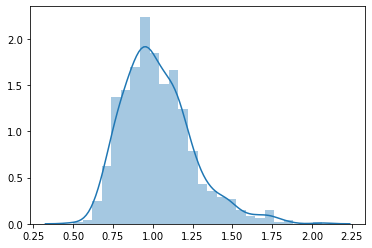

In [27]:
sns.distplot(mode_result['beta1'])dfdf

In [38]:
mode_result = pickle.load(open('../model/MC_SIMUL_SLR_MEM_second.pkl','rb'))

In [39]:
mode_result

{'beta0': [-1.3367444115336733],
 'beta1': [1.599251762277096],
 'mu_x': [0.593783799656502],
 's2_x': [0.6272635101149084],
 's2_ep': [0.2630449689138618],
 's2_v': [0.7814842546171037],
 's2_d': [1.8458056600455968],
 'x': [1.181979734255353]}